# Classification

# 1. Iris Dataset
* R. Fisher, The use of multiple measurements in taxonomic problems, 1936
* Widely used in statistical analysis and introductory machine learning 
* 150 samples
* 5 attributes 
* 3 species

### 1.1. Load the dataset

In [103]:
import pandas as pd
iris = pd.read_csv('Iris.csv', header = None)
# Create column labels
iris.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']

### 1.2. Dataset information

In [104]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [105]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [106]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [107]:
iris.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 1.3. Plots

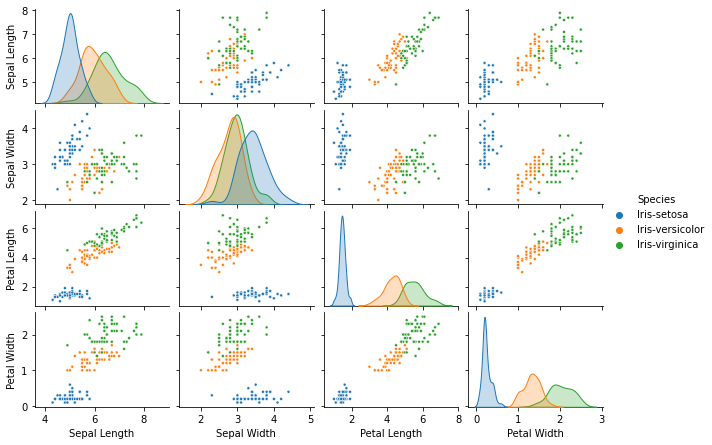

In [108]:
import seaborn as sns
plot = sns.pairplot(iris, hue = 'Species', markers = '.')
plot.fig.set_size_inches(10,6)
plot.fig.subplots_adjust(right = 0.85)

## 2. Split dataset into training and testing

In [109]:
from sklearn.model_selection import train_test_split
# It is important to shuffle the data, otherwise all test samples are from the same class
# Set the random state to reproduce the results
# Stratify the selection so that the training set and test set contain 
# the same proportion from each class as the original dataset
train_set, test_set = train_test_split(iris, test_size = 0.2, shuffle = True, random_state = 1, stratify = iris['Species'])
print("Training Set")
print("------------")
print(train_set['Species'].value_counts())
print()
print("Test Set")
print("--------")
print(test_set['Species'].value_counts())

Training Set
------------
Iris-setosa        40
Iris-virginica     40
Iris-versicolor    40
Name: Species, dtype: int64

Test Set
--------
Iris-versicolor    10
Iris-virginica     10
Iris-setosa        10
Name: Species, dtype: int64


## 3. Cross validation
* Different results are obtained for each sampled test set

### 3.1. Leave one out 
* Each training set is created by taking all the samples except one
* The test set consists of the one sample that is left out
* The experiment is repeated 𝑛 times

In [110]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
for train_index, test_index in loo.split(iris):
    print(train_index, test_index)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149] [0]
[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96 

### 3.2. k-fold cross validation
* Divide the 𝑛 samples into 𝑘 groups of samples (folds) of equal size
* Train using 𝑘-1 folds
* Test using remaining fold
* The size of the test set is 𝑛/𝑘 or 100/𝑘 % of the dataset

In [111]:
import matplotlib.pyplot as plt

"""Create a sample plot for indices of a cross-validation object."""
def plot_cv_indices(cv, X, y):

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        plt.scatter(range(len(indices)), [ii + .5] * len(indices), c = indices, marker = '_', lw = 10, cmap = "cool", vmin = -.2, vmax = 1.2)

    # Plot the data classes at the end
    plt.scatter(range(len(X)), [ii + 1.5] * len(X), c = y, marker = '_', lw = 10, cmap = "Paired")

    # Formatting
    n_splits = ii + 1
    plt.yticks(np.arange(n_splits+1) + .5, labels = list(range(n_splits)) + ['class'])
    plt.xlabel('Sample index')
    plt.ylabel('CV iteration')
    plt.ylim([n_splits+1.2, -.2])
    plt.show()

C:\Users\mjolly\Anaconda3\envs\KerasEnv\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


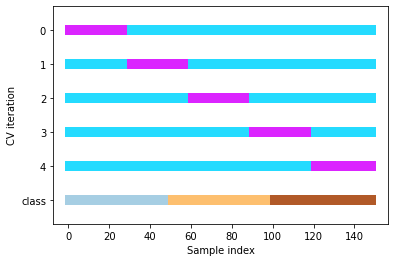

In [112]:
from sklearn.model_selection import KFold
# Number of folds is 5, test set size is 20%
# The data can be shuffled before sampling
# Set the random state to reproduce the results
kFolds = KFold(n_splits = 5, shuffle = False, random_state = 1)
# Generate the splits and plot them
X = iris.iloc[:,:4].values
y = pd.factorize(iris['Species'].values)[0]
plot_cv_indices(kFolds, X, y)

### 3.3. Stratified k-fold cross validation
* When the folds are chosen randomly, it could happen that not all classes are represented in all folds
* Stratified k-fold cross validation preserves the percentage of samples for each class in each fold

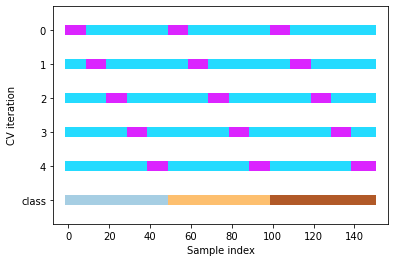

In [113]:
from sklearn.model_selection import StratifiedKFold
# Number of folds is 5, test set size is 20%
# The data can be shuffled before sampling
# Set the random state to reproduce the results
kFolds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = 1)
# Generate the splits and plot them
X = iris.iloc[:,:4].values
y = pd.factorize(iris['Species'].values)[0]
plot_cv_indices(kFolds, X, y)

### 3.4. Shuffle split

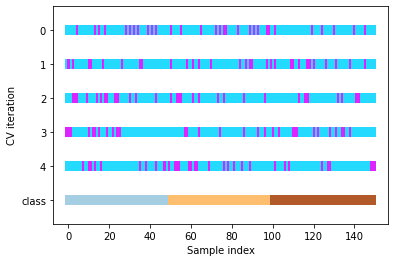

In [114]:
from sklearn.model_selection import ShuffleSplit
# Specify both the test size and the number of splits
# Set the random state to reproduce the results
splits = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)
# Generate the splits and plot them
X = iris.iloc[:,:4].values
y = pd.factorize(iris['Species'].values)[0]
plot_cv_indices(splits, X, y)

### 5.5. Stratified shuffle split

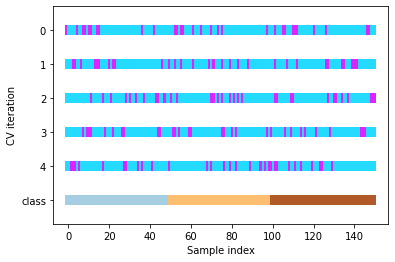

In [115]:
from sklearn.model_selection import StratifiedShuffleSplit
# Specify both the test size and the number of splits
# Set the random state to reproduce the results
splits = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)
# Generate the splits and plot them
X = iris.iloc[:,:4].values
y = pd.factorize(iris['Species'].values)[0]
plot_cv_indices(splits, X, y)